## ETA-PREDICTION-FOR-DELIVERY-COMPANY

### Business Understanding

Ride-hailing apps like Uber and Yassir depend heavily on real-time data and sophisticated machine learning algorithms to streamline and enhance their services. Accurate ETA predictions are crucial for several reasons:

- Customer Satisfaction:
Accurate ETA estimates provide customers with reliable information about when their ride will arrive. This improves their overall experience and satisfaction.
Reliable ETAs build trust with customers, leading to higher retention rates and positive reviews.

- Operational Efficiency:
By predicting ETAs more accurately, Yassir can optimize the distribution of drivers and resources. This ensures that drivers are effectively assigned to rides based on demand and proximity, reducing idle time and improving operational efficiency.
Improved ETA predictions can help reduce operational costs by minimizing wait times and inefficient routes. This leads to better fuel usage and lower overall costs.

- Competitive Advantage:
In a competitive market, offering more accurate ETAs can differentiate Yassir from its competitors. This can attract more users and partners who value reliability and efficiency.
Accurate ETAs can enhance relationships with business partners by providing them with reliable scheduling information and improving the overall service experience.

- Impact on Business Strategy:
Savings from improved efficiency can be reinvested into other areas of the business, such as technology upgrades, marketing, or expansion efforts.
Leveraging real-time data and advanced analytics can drive strategic decisions and foster innovation within the company.

#### Objectives
The goal of this project is to develop a machine learning model that predicts the estimated time of arrival (ETA) at the dropoff point for a single Yassir journey. This model will:

- Enhance Accuracy

- Improve Efficiency

- Drive Innovation




In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")


In [3]:
# Create a dataframe
train_df = pd.read_csv('../Dataset/Train.csv')
test_df = pd.read_csv('../Dataset/Test.csv')
weather_df = pd.read_csv('../Dataset/Weather.csv')
sample_df = pd.read_csv('../Dataset/SampleSubmission.csv')

### EDA

In [4]:
train_df.head()

,ID,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA
0,000FLWA8,2019-12-04T20:01:50Z,3.258,36.777,3.003,36.718,39627,2784
1,000RGOAM,2019-12-10T22:37:09Z,3.087,36.707,3.081,36.727,3918,576
2,001QSGIH,2019-11-23T20:36:10Z,3.144,36.739,3.088,36.742,7265,526
3,002ACV6R,2019-12-01T05:43:21Z,3.239,36.784,3.054,36.763,23350,3130
4,0039Y7A8,2019-12-17T20:30:20Z,2.912,36.707,3.207,36.698,36613,2138


In [5]:
test_df.head()

,ID,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance
0,000V4BQX,2019-12-21T05:52:37Z,2.981,36.688,2.978,36.754,17549
1,003WBC5J,2019-12-25T21:38:53Z,3.032,36.769,3.074,36.751,7532
2,004O4X3A,2019-12-29T21:30:29Z,3.035,36.711,3.010,36.758,10194
3,006CEI5B,2019-12-31T22:51:57Z,2.902,36.738,3.208,36.698,32768
4,009G0M2T,2019-12-28T21:47:22Z,2.860,36.692,2.828,36.696,4513


In [6]:
weather_df.head()

,date,dewpoint_2m_temperature,maximum_2m_air_temperature,mean_2m_air_temperature,mean_sea_level_pressure,minimum_2m_air_temperature,surface_pressure,total_precipitation,u_component_of_wind_10m,v_component_of_wind_10m
0,2019-11-01,290.630524,296.434662,294.125061,101853.617188,292.503998,100806.351562,0.004297,3.561323,0.941695
1,2019-11-02,289.135284,298.432404,295.551666,101225.164062,293.337921,100187.250000,0.001767,5.318593,3.258237
2,2019-11-03,287.667694,296.612122,295.182831,100806.617188,293.674316,99771.414062,0.000797,8.447649,3.172982
3,2019-11-04,287.634644,297.173737,294.368134,101240.929688,292.376221,100200.843750,0.000393,5.991428,2.236700
4,2019-11-05,286.413788,294.284851,292.496979,101131.750000,289.143066,100088.500000,0.004658,6.962730,2.655364


checking for data types

In [7]:
train_df.shape

(83924, 8)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83924 entries, 0 to 83923
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               83924 non-null  object 
 1   Timestamp        83924 non-null  object 
 2   Origin_lat       83924 non-null  float64
 3   Origin_lon       83924 non-null  float64
 4   Destination_lat  83924 non-null  float64
 5   Destination_lon  83924 non-null  float64
 6   Trip_distance    83924 non-null  int64  
 7   ETA              83924 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 5.1+ MB


In [9]:
train_df['Timestamp'] = pd.to_datetime(train_df['Timestamp'])

Checking statistical info

In [10]:
train_df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
ID,83924,83924,ZZZY11ZN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Timestamp,83924,NaN,NaN,NaN,2019-12-04 14:22:20.568883712+00:00,2019-11-19 23:00:08+00:00,2019-11-27 01:53:00.500000+00:00,2019-12-04 01:46:50.500000+00:00,2019-12-11 21:36:44+00:00,2019-12-19 23:59:29+00:00,NaN
Origin_lat,83924.0,NaN,NaN,NaN,3.052406,2.807,2.994,3.046,3.095,3.381,0.096388
Origin_lon,83924.0,NaN,NaN,NaN,36.739358,36.589,36.721,36.742,36.76,36.82,0.032074
Destination_lat,83924.0,NaN,NaN,NaN,3.056962,2.807,2.995,3.049,3.109,3.381,0.10071
Destination_lon,83924.0,NaN,NaN,NaN,36.737732,36.596,36.718,36.742,36.76,36.819,0.032781
Trip_distance,83924.0,NaN,NaN,NaN,13527.82141,1.0,6108.0,11731.5,19369.0,62028.0,9296.716006
ETA,83924.0,NaN,NaN,NaN,1111.697762,1.0,701.0,1054.0,1456.0,5238.0,563.565486


checking for null values

In [11]:
train_df.isna().sum()

ID                 0
Timestamp          0
Origin_lat         0
Origin_lon         0
Destination_lat    0
Destination_lon    0
Trip_distance      0
ETA                0
dtype: int64

checking for duplicates

In [12]:
train_df.duplicated().sum()

np.int64(0)

In [13]:
train_df1 = train_df.copy()

In [14]:
train_df1.set_index('Timestamp', inplace=True)


In [15]:
train_df1.sort_index(ascending=True, inplace=True)

In [16]:
train_df1.head(10)

,ID,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA
Timestamp,,,,,,,
2019-11-19 23:00:08+00:00,UYFJUFF0,3.021,36.751,3.031,36.769,3898,556
2019-11-19 23:00:10+00:00,A5O0F035,2.972,36.760,3.006,36.728,5861,785
2019-11-19 23:00:38+00:00,5773G56H,2.850,36.682,3.048,36.784,26065,1661
2019-11-19 23:00:44+00:00,V9U1CHGP,2.984,36.757,3.005,36.777,4943,629
2019-11-19 23:00:53+00:00,6J9AO2C8,2.861,36.761,3.186,36.721,37492,2181
2019-11-19 23:01:12+00:00,R3U0AAH5,2.923,36.763,3.058,36.700,21760,1428
2019-11-19 23:01:17+00:00,WV58W36N,3.014,36.761,2.995,36.748,3784,311
2019-11-19 23:01:29+00:00,3EVI2SKI,3.021,36.751,3.032,36.769,3895,555
2019-11-19 23:01:31+00:00,ONBRIMZR,3.022,36.751,3.031,36.770,3895,555


In [17]:
train_df1.tail(10)

,ID,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA
Timestamp,,,,,,,
2019-12-19 23:58:04+00:00,Z5XSWF98,2.829,36.695,3.186,36.721,41325,2302
2019-12-19 23:58:17+00:00,7PGR2SVS,3.008,36.770,2.923,36.763,9467,792
2019-12-19 23:58:29+00:00,J6CM8EP0,3.008,36.770,2.923,36.763,9471,792
2019-12-19 23:58:37+00:00,5WASFI0M,2.953,36.714,3.031,36.770,12239,1097
2019-12-19 23:58:38+00:00,IPMT6GYD,3.008,36.770,2.828,36.695,22892,1130
2019-12-19 23:58:39+00:00,1ID05SCC,3.052,36.773,2.980,36.754,11650,1019
2019-12-19 23:59:01+00:00,FPTS95LV,3.052,36.773,2.980,36.753,11650,1019
2019-12-19 23:59:21+00:00,4J9YL24R,3.063,36.724,3.074,36.752,8191,926
2019-12-19 23:59:25+00:00,N8497SX3,3.032,36.770,3.029,36.758,2617,299


In [18]:

# Generate the complete date range with minute frequency
complete_date_range = pd.date_range(start=train_df1.index.min(), end=train_df1.index.max(), freq='min')

# Get unique values for Origin_lat and Origin_lon
Origin_lats = train_df1['Origin_lat'].unique()
#Origin_lons = train_df1['Origin_lon'].unique()

# Create a DataFrame with all possible combinations of dates, Origin_lats
all_combinations = pd.MultiIndex.from_product([complete_date_range, Origin_lats], names=['Timestamp', 'Origin_lat'])
all_df = pd.DataFrame(index=all_combinations).reset_index()

# Merge with the original DataFrame to fill missing values
train_df_filled = pd.concat([all_df, train_df1.reset_index()], ignore_index=True)

# Fill remaining missing values with zeros
train_df_filled['Trip_distance'] = train_df_filled['Trip_distance'].fillna(0)
train_df_filled['ETA'] = train_df_filled['ETA'].fillna(0)

print("DataFrame with missing dates filled:")
print(train_df_filled.head())


DataFrame with missing dates filled:
                  Timestamp  Origin_lat   ID  Origin_lon  Destination_lat  \
0 2019-11-19 23:00:08+00:00       3.021  NaN         NaN              NaN   
1 2019-11-19 23:00:08+00:00       2.972  NaN         NaN              NaN   
2 2019-11-19 23:00:08+00:00       2.850  NaN         NaN              NaN   
3 2019-11-19 23:00:08+00:00       2.984  NaN         NaN              NaN   
4 2019-11-19 23:00:08+00:00       2.861  NaN         NaN              NaN   

   Destination_lon  Trip_distance  ETA  
0              NaN            0.0  0.0  
1              NaN            0.0  0.0  
2              NaN            0.0  0.0  
3              NaN            0.0  0.0  
4              NaN            0.0  0.0  


In [19]:
train_df_filled.shape

(24655604, 8)

In [20]:
print(f'Number of rows in train_df = {train_df1.shape[0]} \nNumber of rows in train_filled_df = {train_df_filled.shape[0]}')
print(f'Number of missing rows : {train_df_filled.shape[0] - train_df1.shape[0]}')

Number of rows in train_df = 83924 
Number of rows in train_filled_df = 24655604
Number of missing rows : 24571680


In [21]:

# Generate the complete date range with minute frequency
complete_date_range = pd.date_range(start=train_df1.index.min(), end=train_df1.index.max(), freq='D')

# Get unique values for Origin_lat and Origin_lon
Origin_lats = train_df1['Origin_lat'].unique()
Origin_lons = train_df1['Origin_lon'].unique()

# Create a DataFrame with all possible combinations of dates, Origin_lats
all_combinations = pd.MultiIndex.from_product([complete_date_range, Origin_lats, Origin_lons], names=['Timestamp', 'Origin_lat', 'Origin_lon'])
all_df = pd.DataFrame(index=all_combinations).reset_index()

# Merge with the original DataFrame to fill missing values
train_df_filled = pd.concat([all_df, train_df1.reset_index()], ignore_index=True)

# Fill remaining missing values with zeros
train_df_filled['Trip_distance'] = train_df_filled['Trip_distance'].fillna(0)
train_df_filled['ETA'] = train_df_filled['ETA'].fillna(0)

print("DataFrame with missing dates filled:")
print(train_df_filled.head())


DataFrame with missing dates filled:
                  Timestamp  Origin_lat  Origin_lon   ID  Destination_lat  \
0 2019-11-19 23:00:08+00:00       3.021      36.751  NaN              NaN   
1 2019-11-19 23:00:08+00:00       3.021      36.760  NaN              NaN   
2 2019-11-19 23:00:08+00:00       3.021      36.682  NaN              NaN   
3 2019-11-19 23:00:08+00:00       3.021      36.757  NaN              NaN   
4 2019-11-19 23:00:08+00:00       3.021      36.761  NaN              NaN   

   Destination_lon  Trip_distance  ETA  
0              NaN            0.0  0.0  
1              NaN            0.0  0.0  
2              NaN            0.0  0.0  
3              NaN            0.0  0.0  
4              NaN            0.0  0.0  


In [22]:
print(f'Number of rows in train_df = {train_df1.shape[0]} \nNumber of rows in train_filled_df = {train_df_filled.shape[0]}')
print(f'Number of missing rows : {train_df_filled.shape[0] - train_df1.shape[0]}')

Number of rows in train_df = 83924 
Number of rows in train_filled_df = 4133764
Number of missing rows : 4049840


In [44]:

# Generate the complete date range with minute frequency
complete_date_range = pd.date_range(start=train_df1.index.min(), end=train_df1.index.max(), freq='H')

# Get unique values for Origin_lat and Origin_lon
Origin_lats = train_df1['Origin_lat'].unique()
#Origin_lons = train_df1['Origin_lon'].unique()

# Create a DataFrame with all possible combinations of dates, Origin_lats
all_combinations = pd.MultiIndex.from_product([complete_date_range, Origin_lats, Origin_lons], names=['Timestamp', 'Origin_lat', 'Origin_lon'])
all_df = pd.DataFrame(index=all_combinations).reset_index()

# Merge with the original DataFrame to fill missing values
train_df_filled = pd.concat([all_df, train_df1.reset_index()], ignore_index=True)

# Fill remaining missing values
#train_df_filled['Origin_lon'] = train_df_filled['Origin_lon'].bfill()
#train_df_filled['Destination_lon'] = train_df_filled['Destination_lon'].bfill()
#train_df_filled['Destination_lat'] = train_df_filled['Destination_lat'].bfill()
train_df_filled['Trip_distance'] = train_df_filled['Trip_distance'].fillna(0)
train_df_filled['ETA'] = train_df_filled['ETA'].fillna(0)



In [45]:
train_df_filled.sort_values(by=['Timestamp'],inplace=True,ignore_index=True)

In [46]:
train_df_filled.head(100)

,Timestamp,Origin_lat,Origin_lon,ID,Destination_lat,Destination_lon,Trip_distance,ETA
0,2019-11-19 23:00:08+00:00,3.021,36.751,NaN,NaN,NaN,0.0,0.0
1,2019-11-19 23:00:08+00:00,2.914,36.680,NaN,NaN,NaN,0.0,0.0
2,2019-11-19 23:00:08+00:00,2.914,36.799,NaN,NaN,NaN,0.0,0.0
3,2019-11-19 23:00:08+00:00,2.914,36.624,NaN,NaN,NaN,0.0,0.0
4,2019-11-19 23:00:08+00:00,2.914,36.664,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...
95,2019-11-19 23:00:08+00:00,2.914,36.777,NaN,NaN,NaN,0.0,0.0
96,2019-11-19 23:00:08+00:00,2.914,36.813,NaN,NaN,NaN,0.0,0.0
97,2019-11-19 23:00:08+00:00,2.914,36.808,NaN,NaN,NaN,0.0,0.0
98,2019-11-19 23:00:08+00:00,2.914,36.686,NaN,NaN,NaN,0.0,0.0


In [56]:
start = train_df1.index.max()
end = train_df1.index.max()
print(f'Start date:{start}\nEnd date:{end}')

Start date:2019-12-19 23:59:29+00:00
End date:2019-12-19 23:59:29+00:00


In [57]:
train_df_filled_noid = train_df_filled.drop(columns=['ID'])

In [60]:
train_df_filled_noid.shape

(94275364, 7)

In [61]:
train_df_filled_noid.isna().sum()

Timestamp                 0
Origin_lat                0
Origin_lon                0
Destination_lat    94191440
Destination_lon    94191440
Trip_distance             0
ETA                       0
dtype: int64

In [80]:
train_df_noid.head()

,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA,Year,Day,Month_name,Day_name,Hour,Minute
0,2019-12-04 20:01:50+00:00,3.258,36.777,3.003,36.718,39627,2784,2019,4,December,Wednesday,12,4
1,2019-12-10 22:37:09+00:00,3.087,36.707,3.081,36.727,3918,576,2019,10,December,Tuesday,12,10
2,2019-11-23 20:36:10+00:00,3.144,36.739,3.088,36.742,7265,526,2019,23,November,Saturday,11,23
3,2019-12-01 05:43:21+00:00,3.239,36.784,3.054,36.763,23350,3130,2019,1,December,Sunday,12,1
4,2019-12-17 20:30:20+00:00,2.912,36.707,3.207,36.698,36613,2138,2019,17,December,Tuesday,12,17


In [77]:
train_df_noid['Year'] = train_df_noid['Timestamp'].dt.year
#train_df_noid['Month'] = train_df_noid['Timestamp'].dt.month
train_df_noid['Day'] = train_df_noid['Timestamp'].dt.day
train_df_noid['Month_name'] = train_df_noid['Timestamp'].dt.strftime('%B')
train_df_noid['Day_name'] = train_df_noid['Timestamp'].dt.strftime('%A')
train_df_noid['Hour'] = train_df_noid['Timestamp'].dt.month
train_df_noid['Minute'] = train_df_noid['Timestamp'].dt.day


In [82]:
train_df_noid.isna().sum()

Timestamp          0
Origin_lat         0
Origin_lon         0
Destination_lat    0
Destination_lon    0
Trip_distance      0
ETA                0
Year               0
Day                0
Month_name         0
Day_name           0
Hour               0
Minute             0
dtype: int64

In [83]:
train_df_noid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83924 entries, 0 to 83923
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Timestamp        83924 non-null  datetime64[ns, UTC]
 1   Origin_lat       83924 non-null  float64            
 2   Origin_lon       83924 non-null  float64            
 3   Destination_lat  83924 non-null  float64            
 4   Destination_lon  83924 non-null  float64            
 5   Trip_distance    83924 non-null  int64              
 6   ETA              83924 non-null  int64              
 7   Year             83924 non-null  int32              
 8   Day              83924 non-null  int32              
 9   Month_name       83924 non-null  object             
 10  Day_name         83924 non-null  object             
 11  Hour             83924 non-null  int32              
 12  Minute           83924 non-null  int32              
dtypes: datetime64[ns

#### **Univariat Analysis

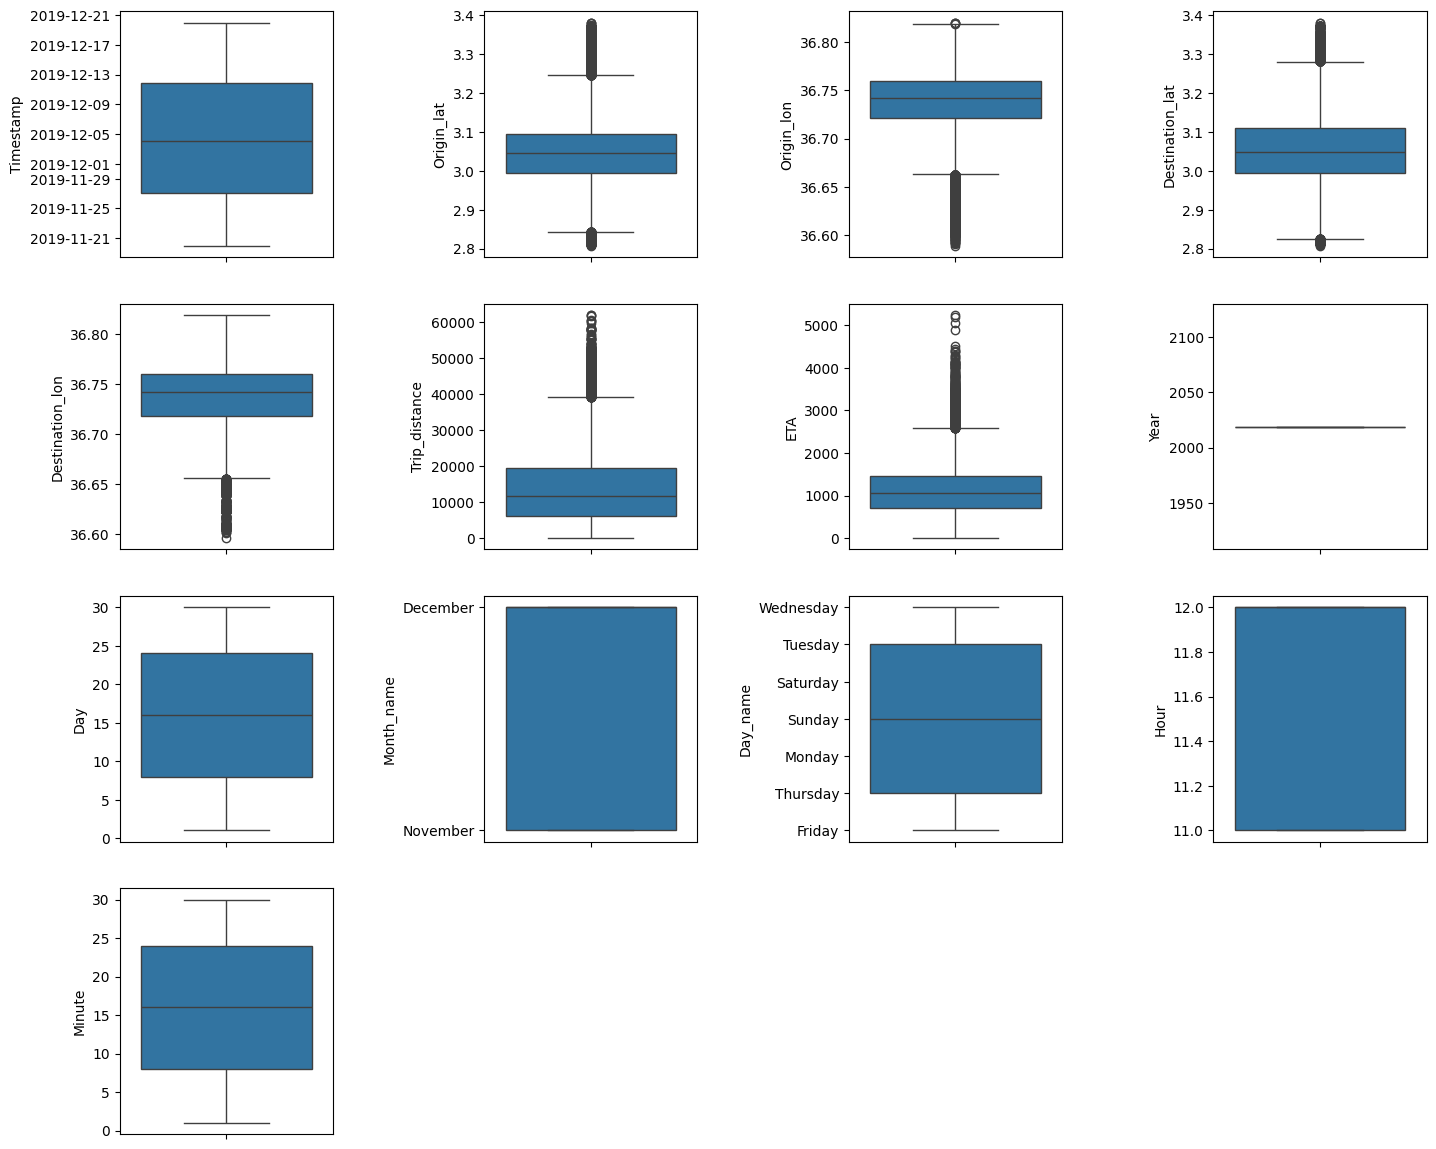

In [81]:
#train_df_noid = train_df.drop(['ID'], axis=1)

plt.figure(figsize=(15, 15))

for i, variable in enumerate(train_df_noid):
    plt.subplot(5,4, i + 1)
    sns.boxplot(train_df_noid,y=train_df_noid[variable])
    plt.tight_layout(pad=3)
    plt.xticks(rotation=45)

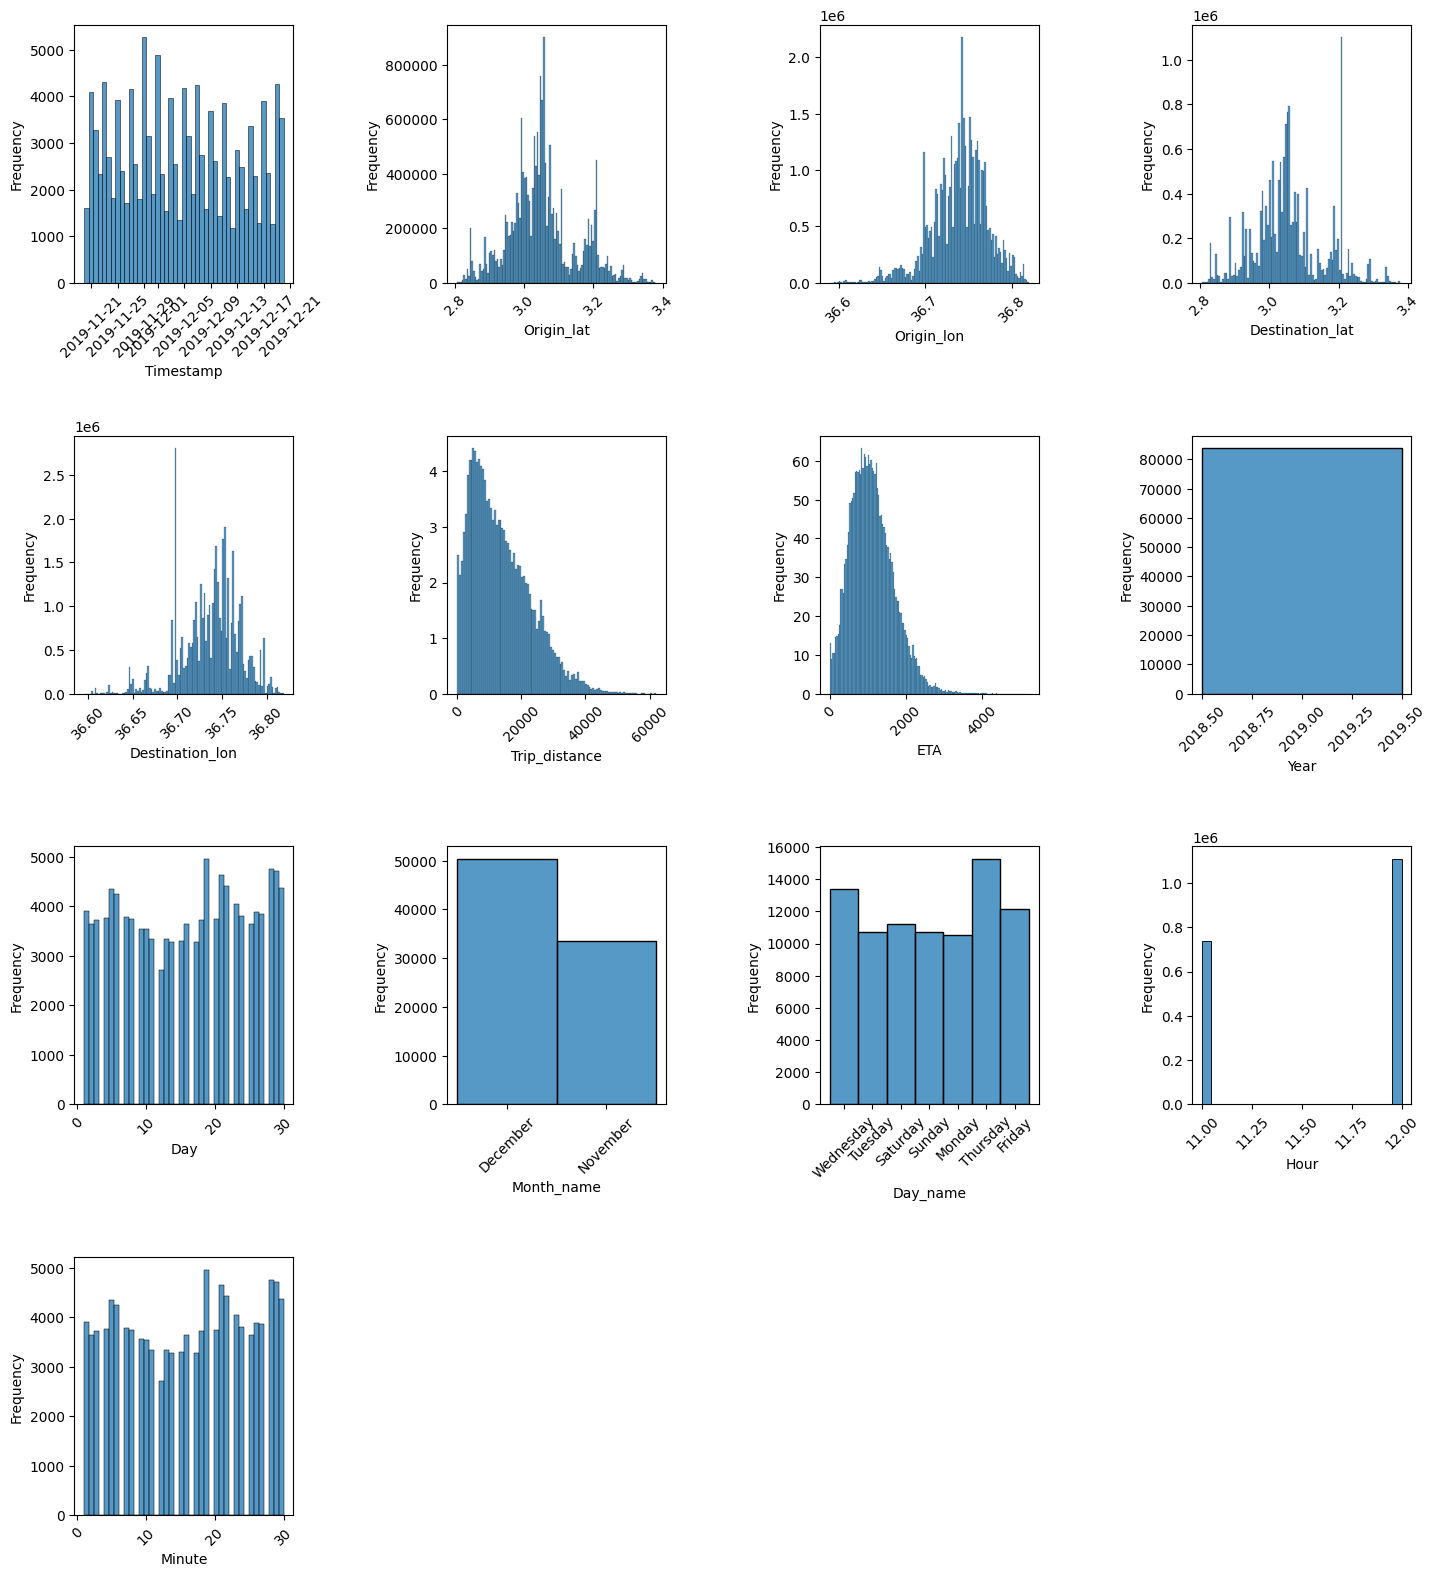

In [84]:
plt.figure(figsize=(15, 20))

for i, variable in enumerate(train_df_noid):
    plt.subplot(5,4, i + 1)
    sns.histplot(train_df_noid,x=train_df_noid[variable], stat='frequency')
    plt.tight_layout(pad=3)
    plt.xticks(rotation=45)

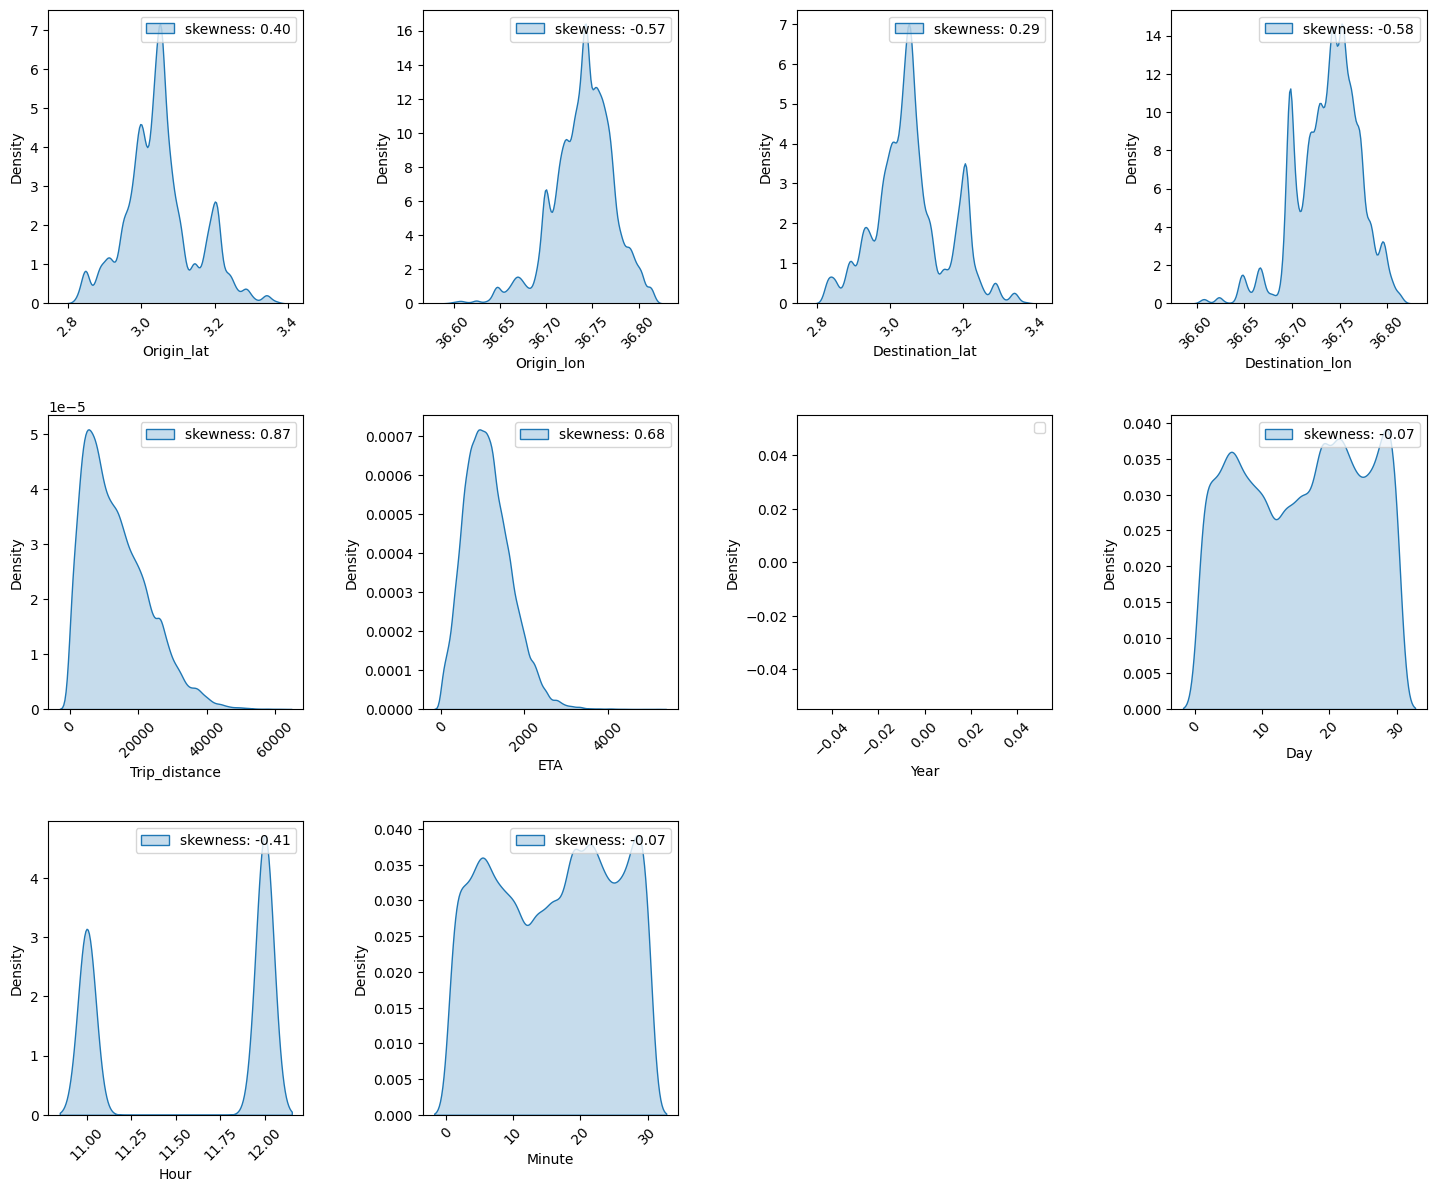

In [86]:
# Plot a Kernel density plot for the variables
plt.figure(figsize=(15, 20))

for i, variable in enumerate(train_df_noid.drop(['Timestamp','Month_name', 'Day_name'], axis=1)):
    plt.subplot(5,4, i + 1)
    sns.kdeplot(train_df_noid,x=train_df_noid[variable],label= 'skewness: %.2f'%(train_df_noid[variable].skew()), fill = True,)
    plt.tight_layout(pad=3)
    plt.legend(loc = 'upper right')
    plt.xticks(rotation=45)